In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

MULTIPLIER = 2
FIGSIZE=(3*MULTIPLIER,2*MULTIPLIER)
DPI=200
SCOPE = 480

# Constants for font sizes
""" LEGEND_FONTSIZE = 18
AXIS_FONTSIZE = 18
TICK_FONTSIZE = 16
TEXT_FONTSIZE = 16
TITLE_FONTSIZE = 30
TITLE_PAD = 50 """

' LEGEND_FONTSIZE = 18\nAXIS_FONTSIZE = 18\nTICK_FONTSIZE = 16\nTEXT_FONTSIZE = 16\nTITLE_FONTSIZE = 30\nTITLE_PAD = 50 '

In [2]:
def load_vmaf_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    frame_nums = [frame['frameNum'] for frame in data['frames']]
    vmaf_scores = [frame['metrics']['vmaf'] for frame in data['frames']]
    return frame_nums, vmaf_scores

def calculate_vmaf(file_paths, d1=50, d2=500, l1=0, l2=1, label='Frankenstein'):
    # Load the VMAF data from each file
    vmaf_data = [load_vmaf_data(file_path) for file_path in file_paths]

    # Calculate mean VMAF scores for each dataset
    mean_vmaf_scores = [np.mean(vmaf_scores) for _, vmaf_scores in vmaf_data]
    
    # Construct title with mean VMAF scores
    title = f"Mean VMAF: GoP 0.5s: {mean_vmaf_scores[0]:.2f} {label}: {mean_vmaf_scores[1]:.2f} GoP 2s: {mean_vmaf_scores[2]:.2f}"
    print(title)

    # Plot the VMAF scores
    plt.figure(figsize=FIGSIZE, dpi=DPI)
    colors = ['b', 'g', 'r']
    labels = ['GoP Size 0.5s', label, 'GoP Size 2s']

    for i, (frame_nums, vmaf_scores) in enumerate(vmaf_data):
        plt.plot(frame_nums[:SCOPE], vmaf_scores[:SCOPE], linestyle='-', color=colors[i], label=labels[i])

    # Add background text
    plt.axvline(x=120, color='grey', linestyle='--', linewidth=2)
    plt.axvline(x=360, color='grey', linestyle='--', linewidth=2)
    plt.text(60, max(max(vmaf_scores) for _, vmaf_scores in vmaf_data) * 1.06, f'{d1} ms Delay \n+ {l1}% Loss', 
             horizontalalignment='center', verticalalignment='bottom', color='black', 
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    plt.text(240, max(max(vmaf_scores) for _, vmaf_scores in vmaf_data) * 1.06, f'{d2} ms Delay \n+ {l2}% Loss', 
             horizontalalignment='center', verticalalignment='bottom', color='black',
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    plt.text(420, max(max(vmaf_scores) for _, vmaf_scores in vmaf_data) * 1.06, f'{d1} ms Delay \n+ {l1}% Loss', 
             horizontalalignment='center', verticalalignment='bottom', color='black',
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

    # Set title with mean VMAF scores
    #plt.title(title)
    plt.xlabel('Frame Number')
    plt.ylabel('VMAF')
    plt.xticks()
    plt.yticks()
    plt.legend(loc='lower left')
    plt.grid(True)

    return plt

Mean VMAF: GoP 0.5s: 72.64 Frankenstein: 48.55 GoP 2s: 55.70


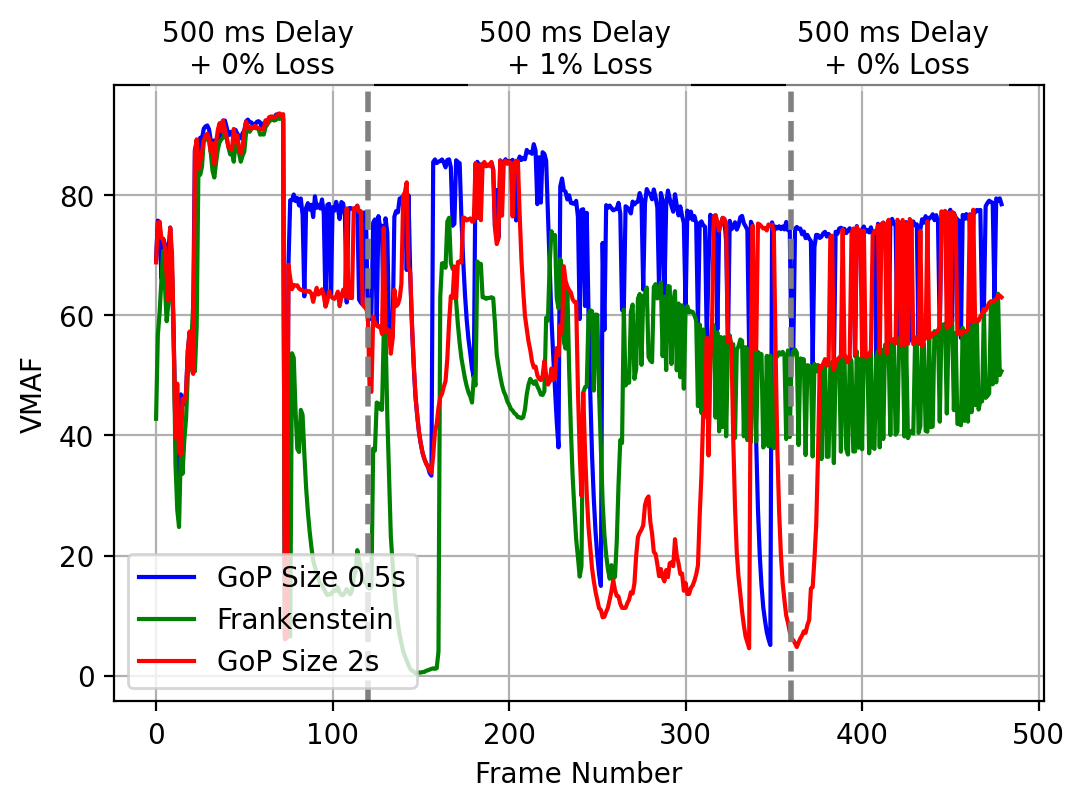

In [6]:
# Adjustments 
file_paths = ['packet_loss_output_12_vs_12.json', 
                'test_frankenstein_gop_48_12_48_packet_loss.json', 
                'packet_loss_output_48_vs_48.json']

plt = calculate_vmaf(file_paths, d1=500, d2=500, l1=0, l2=1, label='Frankenstein')
# Save the plot
plt.savefig('plots/frankenstein.pdf', bbox_inches='tight')

Mean VMAF: GoP 0.5s: 44.27 GoP Size 1s: 44.85 GoP 2s: 46.70


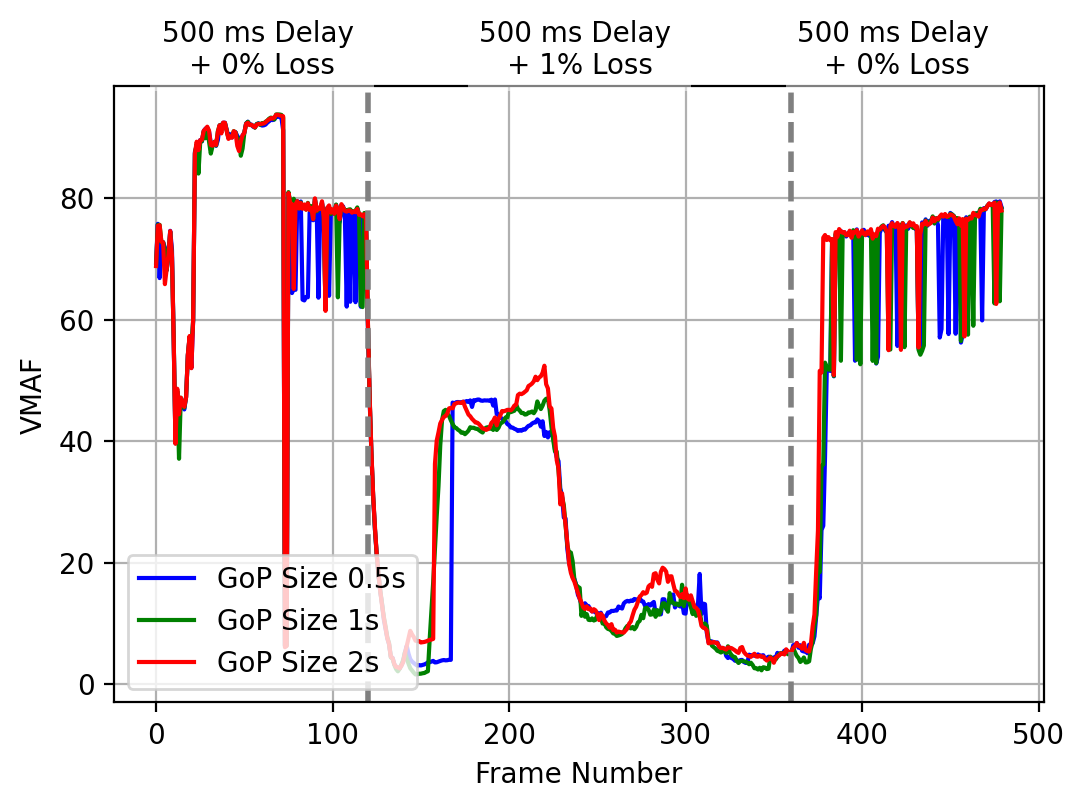

In [4]:
file_paths = ['delay_500_output_12_vs_12.json', 
                'delay_500_output_24_vs_24.json', 
                'delay_500_output_48_vs_48.json']

plt = calculate_vmaf(file_paths, d1=500, d2=500, l1=0, l2=1, label='GoP Size 1s')
# Save the plot
plt.savefig('plots/delay-500.pdf', bbox_inches='tight')

Mean VMAF: GoP 0.5s: 73.08 GoP Size 1s: 75.82 GoP 2s: 80.18


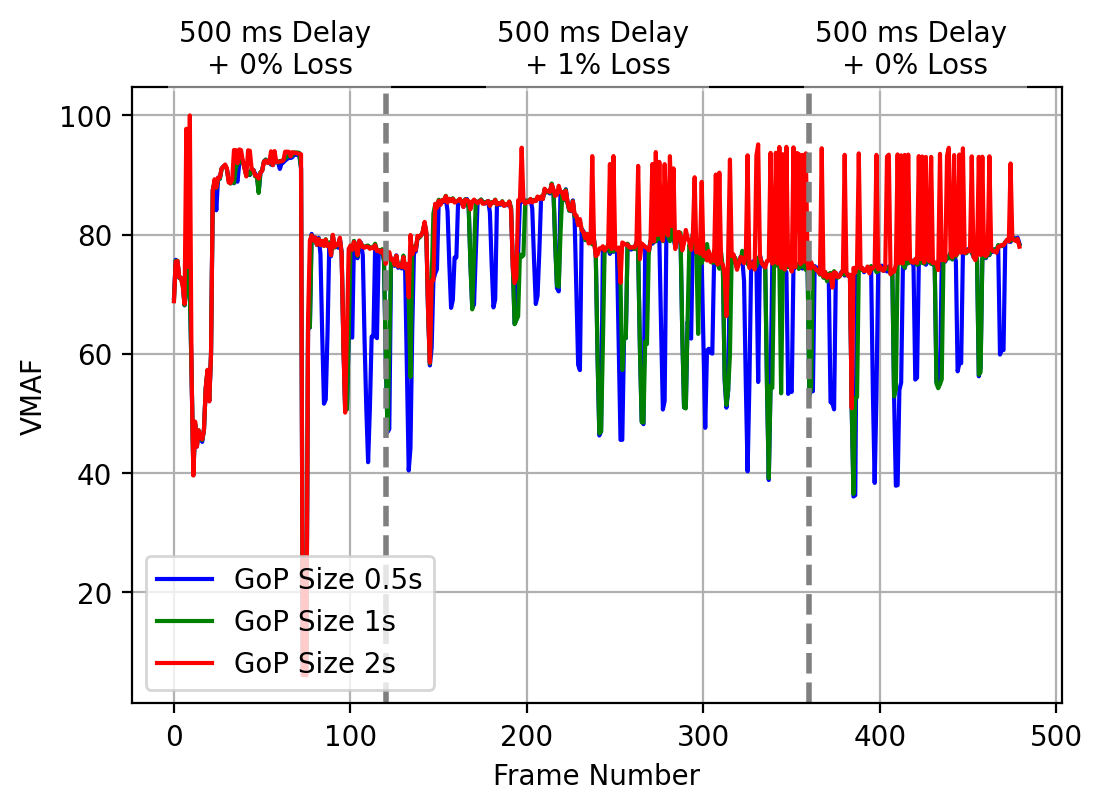

In [151]:
file_paths = ['idle_adjusted_output_12_vs_12.json', 
                'idle_adjusted_output_24_vs_24.json', 
                'idle_adjusted_output_48_vs_48.json']

plt = calculate_vmaf(file_paths, d1=500, d2=500, l1=0, l2=1, label='GoP Size 1s')
# Save the plot
plt.savefig('plots/idle-adjusted-gop-vs-gop-vmaf-over-time.pdf', bbox_inches='tight')

Mean VMAF: GoP 0.5s: 72.64 GoP Size 1s: 51.17 GoP 2s: 55.70


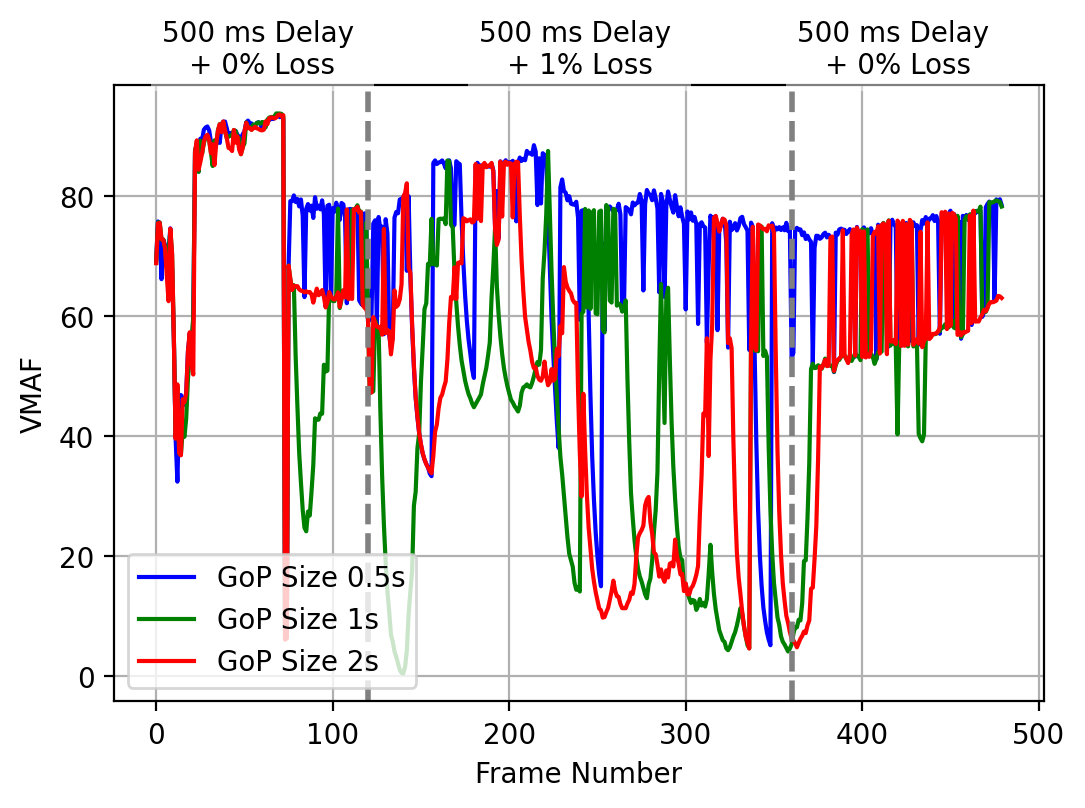

In [152]:
file_paths = ['packet_loss_output_12_vs_12.json', 
                'packet_loss_output_24_vs_24.json', 
                'packet_loss_output_48_vs_48.json']

plt = calculate_vmaf(file_paths, d1=500, d2=500, l1=0, l2=1, label='GoP Size 1s')
# Save the plot
plt.savefig('plots/dynamic-packet-loss-gop-vs-gop-vmaf-over-time.pdf', bbox_inches='tight')

In [153]:
# Function to read JSON data from a file
def read_json_from_file(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def calculate_I_P_interval():
    # Path to your JSON file
    file_path = 'frames.json'

    # Read JSON data from the file
    data = read_json_from_file(file_path)

    # Extracting frame numbers and picture types
    frame_numbers = list(range(len(data['frames'])))  # Frame numbers starting from 0
    print(len(frame_numbers))
    pict_types = [frame['pict_type'] for frame in data['frames']]

    # Convert picture types to numeric values for plotting
    pict_type_map = {'I': 2, 'P': 1}
    pict_type_numbers = [pict_type_map.get(pict_type, 0) for pict_type in pict_types]

    # Plotting the data
    plt.figure(figsize=FIGSIZE, dpi=DPI)
    plt.plot(frame_numbers[:SCOPE], pict_type_numbers[:SCOPE], marker='o', linestyle='-', color='r')
    plt.xlabel('Frame Number')
    plt.ylabel('Picture Type')
    plt.title('Time Series of Picture Types')
    plt.yticks([2, 1], ['I', 'P'])  # Map numeric values back to picture types
    plt.grid(True)
    plt.tight_layout()

    # Show plot
    plt.show()

In [154]:
def calculate_I_P_intervals():
    # List of file paths for your JSON files
    file_paths = [
        'frames-12.json',
        'frames-24.json',
        'frames-48.json',
        #'/Users/birkandenizer/Downloads/GoP_tests/frames.json'
    ]

    # Colors and labels for the plots
    colors = ['b', 'g', 'r', 'm']
    labels = ['GoP 12', 'GoP 24', 'GoP 48', 'Original']

    # Plot each file's data
    plt.figure(figsize=FIGSIZE, dpi=DPI)

    for i, file_path in enumerate(file_paths):
        # Read data from the file
        data = read_json_from_file(file_path)

        # Extract frame numbers and picture types
        frame_numbers = list(range(len(data['frames'])))  # Frame numbers starting from 0
        pict_types = [frame['pict_type'] for frame in data['frames']]

        # Convert picture types to numeric values for plotting
        pict_type_map = {'I': 2, 'P': 1}
        pict_type_numbers = [pict_type_map.get(pict_type, 0) for pict_type in pict_types]

        # Plot the data
        plt.plot(frame_numbers[:SCOPE], pict_type_numbers[:SCOPE], marker='o', linestyle='-', color=colors[i], label=labels[i])

    # Adding plot details
    plt.xlabel('Frame Number')
    plt.ylabel('Picture Type')
    plt.title('Time Series of Picture Types for Multiple Datasets')
    plt.yticks([2, 1], ['I', 'P'])  # Map numeric values back to picture types
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Show plot
    plt.show()

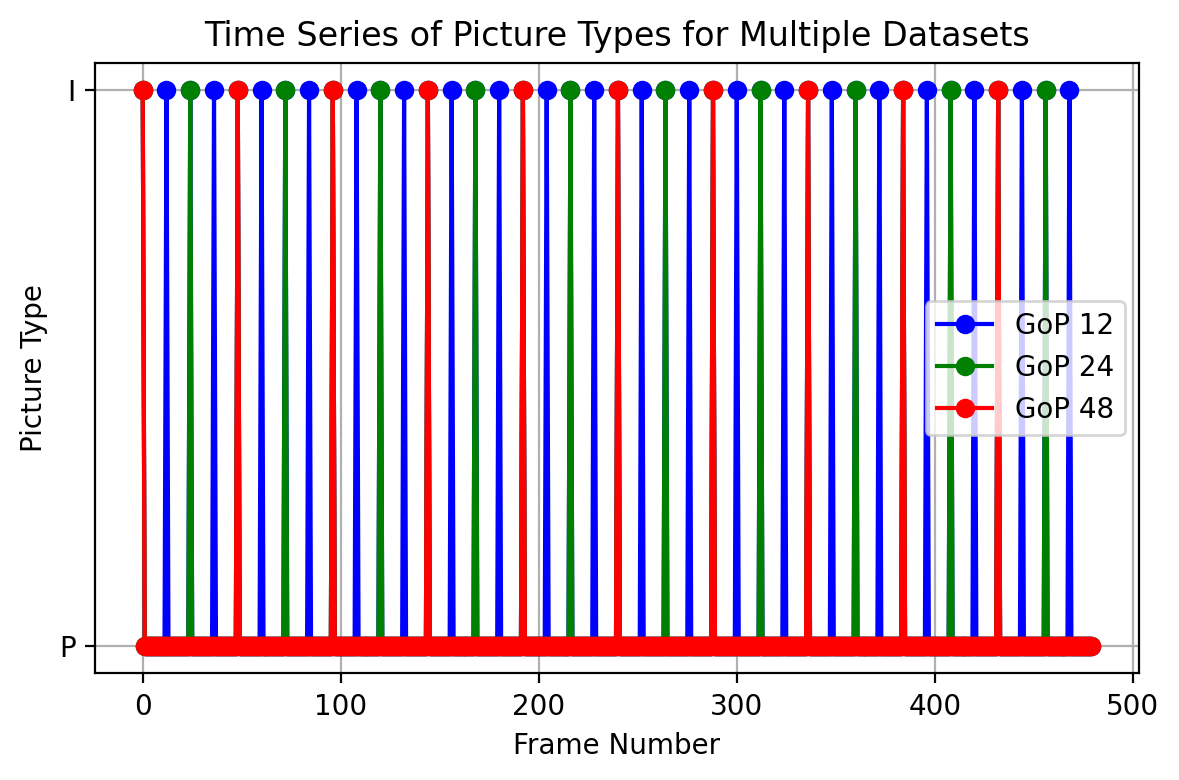

In [155]:
calculate_I_P_intervals()

14315


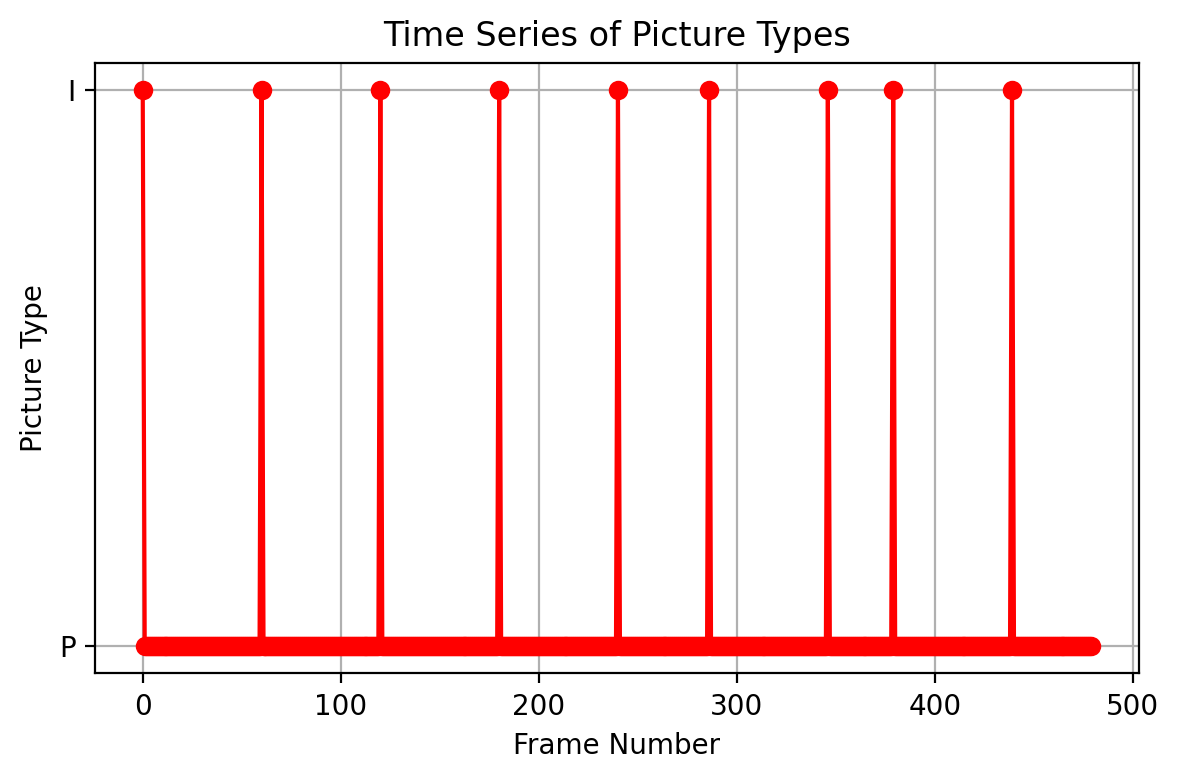

In [156]:
calculate_I_P_interval()